In [1]:
import pandas as pd
import numpy as np

In [2]:
data = "/workspaces/MLZoomCamp_homework/02-regression/data.csv"

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower().str.replace(" ","_")

In [7]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [8]:
strings = list(df.dtypes [df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(" ","_")


In [10]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [11]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


# Exploratory Data Analysis

In [12]:
for col in df.columns:
    print (col)
    print (df[col].unique())
    print ()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler' 'nissan' 'volvo' 'mazda'
 'mitsubishi' 'ferrari' 'alfa_romeo' 'toyota' 'mclaren' 'maybach'
 'pontiac' 'porsche' 'saab' 'gmc' 'hyundai' 'plymouth' 'honda'
 'oldsmobile' 'suzuki' 'ford' 'cadillac' 'kia' 'bentley' 'chevrolet'
 'dodge' 'lamborghini' 'lincoln' 'subaru' 'volkswagen' 'spyker' 'buick'
 'acura' 'rolls-royce' 'maserati' 'lexus' 'aston_martin' 'land_rover'
 'lotus' 'infiniti' 'scion' 'genesis' 'hummer' 'tesla' 'bugatti']

model
['1_series_m' '1_series' '100' '124_spider' '190-class' '2_series' '200'
 '200sx' '240sx' '240' '2' '3_series_gran_turismo' '3_series' '300-class'
 '3000gt' '300' '300m' '300zx' '323' '350-class' '350z' '360' '370z' '3'
 '4_series_gran_coupe' '4_series' '400-class' '420-class' '456m'
 '458_italia' '4c' '4runner' '5_series_gran_turismo' '5_series'
 '500-class' '500e' '500' '500l' '500x' '550' '560-class' '570s' '575m'
 '57' '599' '5' '6_series_gran_coupe' '6_series' '600-class' '6000'
 '612_scaglietti' '6

# Distribution of Price

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

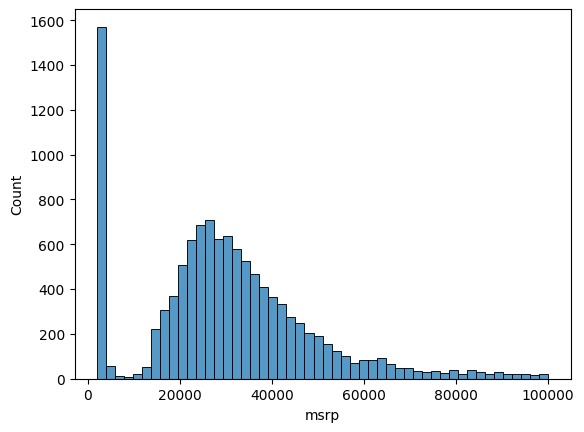

In [14]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

In [15]:
price_logs = np.log1p(df.msrp)

<Axes: xlabel='msrp', ylabel='Count'>

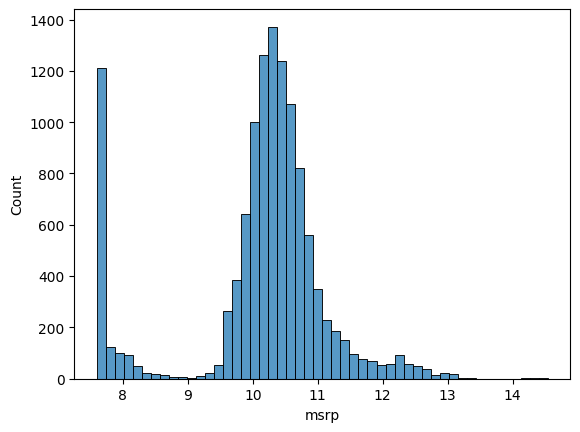

In [16]:
sns.histplot(price_logs, bins=50)

*How to deal with missing values*

In [17]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

# 2.4 Setting up the Validation Framework

*Train/Test/Validation mix: 60/20/20*

In [18]:
n = len(df)

n_val = int(n*.2)
n_test = int(n*.2)
n_train = n - n_val - n_test

In [19]:
n_val,n_test,n_train

(2382, 2382, 7150)

*Must randomize to ensure mix of data across each bin*

In [20]:
idx = np.arange(n)

In [21]:
np.random.seed(2)
np.random.shuffle(idx)

In [22]:
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336], shape=(11914,))

In [23]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [24]:
len(df_train), len(df_test), len(df_val)

(7150, 2382, 2382)

In [25]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


In [26]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)

In [27]:
y_train = np.log1p(df_train.msrp.values)
y_test = np.log1p(df_test.msrp.values)
y_val = np.log1p(df_val.msrp.values)

In [28]:
#must remove the feature of interest (msrp) from all data to ensure it doesn't bias the model we end up building
del df_train['msrp']
del df_test['msrp']
del df_val['msrp']

## 2.5 Linear Regression

In [29]:
#not a lot in the lession.  theoretical form of how a regression model is built/what it entails.
#recall this is of the form g(X) ~ y. 
#  g is the "function" or model we're training
#  X is our feature matrix
#  y is what we're attempting to predict.  Note that this isn't an equivalance...it is an APPROXIMATION - we're trying to get as close as possible,
#  as often as possible

#generalizing, for linear regression, we're creating something along lines of g(x) = w0 + w1x1 + w2x2 + ... + wixi, where:
#  W's are "weights"
#  Xi's are individual data elements from our feature matrix.  imagine a row vector

## 2.6 Linear Regression Vector Form

In [30]:
#similar...easiest to just reference the video.

## 2.7 Training a Linear Regression Model

In [31]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 100]

In [32]:

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [433, 11, 86],
    [38, 54, 185],
    [142, 25, 431],
    [453, 11, 86]
]
X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 433,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   11,   86]])

In [33]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [34]:
X = np.column_stack([ones,X])

In [35]:
XTX = X.T.dot(X)

In [36]:
XTX_inv = np.linalg.inv(XTX)

In [37]:
w_full = XTX_inv.dot(X.T).dot(y)

In [38]:
w0 = w_full[0]
w = w_full[1:]
w0, w

(np.float64(340.0333601531692), array([-0.35021257, -3.29642328, -0.02618666]))

In [39]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]


In [40]:
train_linear_regression(X,y)

LinAlgError: Singular matrix

## 2.8 Car price Baseline Model

In [41]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [42]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].values

# there are some missing values - fill them with zeros
X_train = df_train[base].fillna(0).values

In [43]:
w0, w = train_linear_regression(X_train,y_train)

In [44]:
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

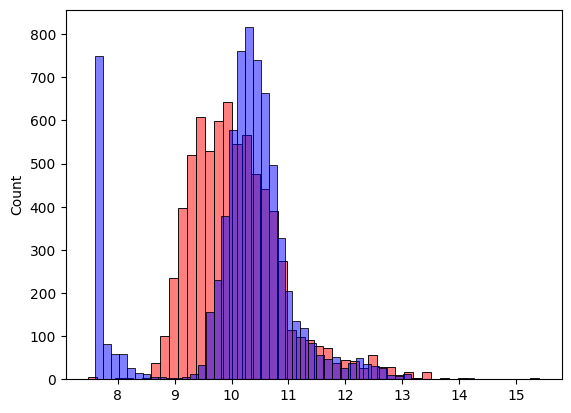

In [45]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

## 2.9 RMSE

In [46]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [47]:
rmse(y_train, y_pred)

np.float64(0.7554192603920132)

## 2.10 Validating the Model

In [48]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].values

# there are some missing values - fill them with zeros
X_train = df_train[base].fillna(0).values

In [49]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [50]:
# more precise means to encapsulate the portion of the data you're using
# also leverages the training dataset to build the model
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

#that model is then used against the validation data (which itself has been shaped according to same process so its compatible)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

# RMSE of the trained model applied to the validation dataset is calculated
rmse(y_val, y_pred)

np.float64(0.761653099130156)

## 2.11 Feature Engineering

In [51]:
2017-df_train.year

0        9
1        5
2        1
3       26
4        0
        ..
7145     2
7146     2
7147     2
7148     3
7149     0
Name: year, Length: 7150, dtype: int64

In [52]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [53]:
X_train = prepare_X(df_train)

In [54]:
X_train

array([[1.480e+02, 4.000e+00, 3.300e+01, 2.400e+01, 1.385e+03, 9.000e+00],
       [1.320e+02, 4.000e+00, 3.200e+01, 2.500e+01, 2.031e+03, 5.000e+00],
       [1.480e+02, 4.000e+00, 3.700e+01, 2.800e+01, 6.400e+02, 1.000e+00],
       ...,
       [2.850e+02, 6.000e+00, 2.200e+01, 1.700e+01, 5.490e+02, 2.000e+00],
       [5.630e+02, 1.200e+01, 2.100e+01, 1.300e+01, 8.600e+01, 3.000e+00],
       [2.000e+02, 4.000e+00, 3.100e+01, 2.200e+01, 8.730e+02, 0.000e+00]],
      shape=(7150, 6))

In [55]:
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5172055461058299)

<Axes: ylabel='Count'>

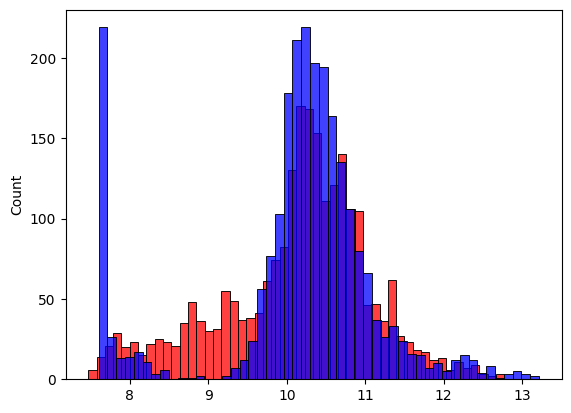

In [56]:
sns.histplot(y_pred, color = 'red', bins = 50)
sns.histplot(y_val, color = 'blue', bins = 50)

## 2.12 Categorical Values

In [57]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [58]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [59]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.515799564150169)

In [60]:
df.make.value_counts().head()
makes = list(df.make.value_counts().head().index)

In [61]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' %v)

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [62]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.5076038849556795)

In [63]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [64]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [65]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')

    for v in [2,3,4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' %v)

    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
            
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [66]:
categories.items()

dict_items([('make', ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']), ('engine_fuel_type', ['regular_unleaded', 'premium_unleaded_(required)', 'premium_unleaded_(recommended)', 'flex-fuel_(unleaded/e85)', 'diesel']), ('transmission_type', ['automatic', 'manual', 'automated_manual', 'direct_drive', 'unknown']), ('driven_wheels', ['front_wheel_drive', 'rear_wheel_drive', 'all_wheel_drive', 'four_wheel_drive']), ('market_category', ['crossover', 'flex_fuel', 'luxury', 'luxury,performance', 'hatchback']), ('vehicle_size', ['compact', 'midsize', 'large']), ('vehicle_style', ['sedan', '4dr_suv', 'coupe', 'convertible', '4dr_hatchback'])])

In [67]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(23.019020704791835)

In [68]:
w0

np.float64(4011091003551887.0)

## 2.13 Regularization

In [69]:
#issues can exist in formulating matrix inverses if some columns are identical.  As a toy example:

X = [
    [4,4,4],
    [3,5,5],
    [5,1,1],
    [5,4,4],
    [7,5,5],
    [4,5,5]
]

X = np.array(X)
X

array([[4, 4, 4],
       [3, 5, 5],
       [5, 1, 1],
       [5, 4, 4],
       [7, 5, 5],
       [4, 5, 5]])

In [70]:
XTX = X.T.dot(X)

In [71]:
# np.linalg.inv(XTX) will now throw an error
# one way to mitigate some of this is to add a small number on the diagnal
XTX = [
    [1, 2, 2],
    [2, 1, 1],
    [2, 1, 1]
]

XTX = XTX + .01 * np.eye(3)
XTX

array([[1.01, 2.  , 2.  ],
       [2.  , 1.01, 1.  ],
       [2.  , 1.  , 1.01]])

In [72]:
#now to integrate this into earlier algorithm
def train_linear_regression_reg (X, y, r=0.001):
    ones = np.ones(X.shape[0]) 
    X = np.column_stack([ones,X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [73]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r= 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

np.float64(0.45652199012897743)

## 2.14 Tuning the Model

In [74]:
for r in [0, 0.0001, 0.001, 0.01, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)

    print(r, w0, score)
     

0 4011091003551887.0 23.019020704791835
0.0001 6.317246071243372 0.4565170654323052
0.001 6.285636717989048 0.45651750867781377
0.01 6.2766071476973995 0.45652199012897743
0.1 6.1912087238544915 0.4565692763007501
1 5.634896668066369 0.45722043179930605
10 4.283980108968471 0.4701456932099909


In [75]:
# you can see from results above that .001 - .0001 provide the best RMSE (somewhat negligible, so go with .001).  Go ahead and retrain the model
# with this value so you've got the "best"
r = .001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

np.float64(0.45651750867781377)

## 2.15 Using the Model

In [78]:
#Remember we split Train/Validate/Test pieces of data, and have been training against Train to use against Validation.
#Now, we're going to use ALL of the train + validate pieces of data to increase the data corpus and use against the test piece

df_full_train = pd.concat([df_train, df_val])

#note that this keeps the indices currently in each of the dataframes, so you need to reset the index

df_full_train = df_full_train.reset_index(drop = True)

In [79]:
df_full_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385
1,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031
2,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640
3,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873
4,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9527,volvo,v60,2015,regular_unleaded,240.0,4.0,automatic,front_wheel_drive,4.0,luxury,midsize,wagon,37,25,870
9528,maserati,granturismo_convertible,2015,premium_unleaded_(required),444.0,8.0,automatic,rear_wheel_drive,2.0,"exotic,luxury,high-performance",midsize,convertible,20,13,238
9529,cadillac,escalade_hybrid,2013,regular_unleaded,332.0,8.0,automatic,rear_wheel_drive,4.0,"luxury,hybrid",large,4dr_suv,23,20,1624
9530,mitsubishi,lancer,2016,regular_unleaded,148.0,4.0,manual,front_wheel_drive,4.0,NaN,compact,sedan,34,24,436


In [80]:
X_full_train = prepare_X(df_full_train)

In [81]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]], shape=(9532, 41))

In [82]:
#also need to have similarly sized y (target/results)
y_full_train = np.concatenate([y_train, y_val])

In [83]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=r)

In [86]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

np.float64(0.4517749310621406)

In [88]:
# Now time to test with "real" data against some random car.  Below uses a single line item (representing a single car) and applies the model
# we've trained.  This is effectively just plotting a point that would fall under the bins of the histogram we've previously plotted

car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [89]:
# our matrix preparation function expects a DataFrame
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [91]:
X_small = prepare_X(df_small)
X_small

array([[2.660e+02, 6.000e+00, 2.500e+01, 1.800e+01, 2.031e+03, 2.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [92]:
cost_pred = w0 + X_small.dot(w)   # this is using w0 and w that were previously built off the whole dataset
cost_pred = cost_pred[0]  # returns a list, so we just need the single element
cost_pred

np.float64(10.462651700289744)

In [93]:
np.expm1(cost_pred)  #this converts our log'd price data back to the actual $$

np.float64(34983.19616272936)

In [94]:
np.expm1(y_test[20])  # grab the *actual* cost to compare our result

np.float64(35000.00000000001)